In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date, time, datetime, timedelta 

In [2]:
Dataset = pd.read_csv("boston_2019.csv", sep=',')

In [4]:
#first we will reound the time for each hour to have a better sight 
#rounding time 
df = pd.DataFrame(Dataset['start_time'])
df['start_time'] = pd.to_datetime(df.start_time)

# round start_time values to next nearest hour
# name it datetime so that it can be merged with the dates of the weather dataset
df['date_time'] = df['start_time'].dt.floor('60min')
df = df.drop('start_time', axis='columns')
df

,date_time
0,2019-01-01 00:00:00
1,2019-01-01 00:00:00
2,2019-01-01 00:00:00
3,2019-01-01 00:00:00
4,2019-01-01 00:00:00
...,...
2522766,2019-12-31 23:00:00
2522767,2019-12-31 23:00:00
2522768,2019-12-31 23:00:00
2522769,2019-12-31 23:00:00


In [4]:
#we will ad user column to the dataframe
df['user'] = Dataset['user_type']
df.head()

,date_time,user
0,2019-01-01 00:00:00,Subscriber
1,2019-01-01 01:00:00,Subscriber
2,2019-01-01 01:00:00,Subscriber
3,2019-01-01 01:00:00,Subscriber
4,2019-01-01 01:00:00,Subscriber


In [5]:
#we will group each hour how many subscribers or customers rent a bike 
data1 = df.groupby(["date_time","user"]).size()
print(data1)

date_time            user      
2019-01-01 00:00:00  Subscriber     1
2019-01-01 01:00:00  Customer       6
                     Subscriber    12
2019-01-01 02:00:00  Customer       4
                     Subscriber    11
                                   ..
2019-12-31 22:00:00  Subscriber    33
2019-12-31 23:00:00  Customer      11
                     Subscriber    23
2020-01-01 00:00:00  Customer       6
                     Subscriber    21
Length: 16893, dtype: int64


In [6]:
#we will add to the data frame a new column calle day to see 
#on how many bikes on each day of the week were rented (not over the year) 
df['day'] = df['date_time'].dt.day_name()

In [7]:
#we will group this as efore but instead of hourly basis, daily basis
data2 = df.groupby(["day","user"]).size()
print(data2)

day        user      
Friday     Customer       72876
           Subscriber    312040
Monday     Customer       62413
           Subscriber    310352
Saturday   Customer      121274
           Subscriber    197606
Sunday     Customer      105513
           Subscriber    181123
Thursday   Customer       61860
           Subscriber    324124
Tuesday    Customer       54829
           Subscriber    329319
Wednesday  Customer       55512
           Subscriber    333930
dtype: int64


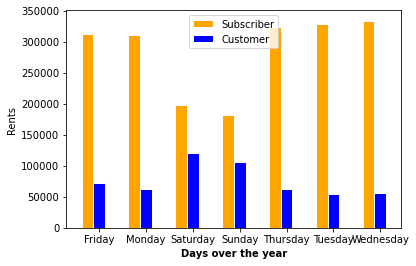

In [47]:
#make the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = data2.loc[(data2.index.get_level_values('user') =="Subscriber")].values
bars2 = data2.loc[(data2.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data2.index.get_level_values('day').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Days over the year")
plt.ylabel("Rents")
plt.show()

In [10]:
#add month column to see te month of the row
df['month'] = df['date_time'].dt.month_name()

In [51]:
#grouping on monthly basis 
data3 = df.groupby(["month","user"]).size()
print(data3)

month      user      
April      Customer       34810
           Subscriber    131865
August     Customer       87334
           Subscriber    250134
December   Customer       10907
           Subscriber     81302
February   Customer        6774
           Subscriber     73676
January    Customer        4788
           Subscriber     65104
July       Customer       82105
           Subscriber    234914
June       Customer       73708
           Subscriber    200401
March      Customer       14522
           Subscriber     87859
May        Customer       51982
           Subscriber    171059
November   Customer       28447
           Subscriber    162325
October    Customer       56709
           Subscriber    248806
September  Customer       82191
           Subscriber    281049
dtype: int64


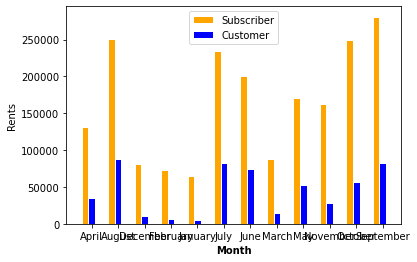

In [58]:
#making the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1= data3.loc[(data3.index.get_level_values('user') =="Subscriber")].values
bars2 = data3.loc[(data3.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data3.index.get_level_values('month').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rents")
plt.show()

In [55]:
#to check how many rents over the weeks on a year
df['week_of_the_year'] = df['date_time'].dt.isocalendar().week

In [56]:
#grouping weekly basis
data4 = df.groupby(["week_of_the_year","user"]).size()
print(data4)

week_of_the_year  user      
1                 Customer       1654
                  Subscriber    13580
2                 Customer        962
                  Subscriber    16653
3                 Customer        988
                                ...  
50                Subscriber    26312
51                Customer       1750
                  Subscriber    18452
52                Customer       2939
                  Subscriber    10612
Length: 104, dtype: int64


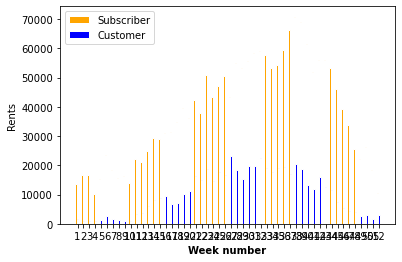

<Figure size 720x432 with 0 Axes>

In [61]:
#making the graphik, i have a little bit of troubles, ill fix it later
# set width of bar
barWidth = 0.25

# set height of bar
bars1= data4.loc[(data4.index.get_level_values('user') =="Subscriber")].values
bars2 = data4.loc[(data4.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data4.index.get_level_values('week_of_the_year').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Week number")
plt.ylabel("Rents")
plt.figure(figsize=(10,6))
plt.show()

In [19]:
#new data frame to check the average drive time
df2 = pd.DataFrame(Dataset['start_time'])
df2['start_time'] = pd.to_datetime(df2.start_time)

In [23]:
#we will need start time as well as end time to 
#calculate the drove time
df2['end_time'] = pd.to_datetime(Dataset['end_time']) 

In [25]:
#new column will be added witch the time on a date format
df2['drive_time_in_date'] = df2['end_time']-df2['start_time']
df2.head()

,start_time,end_time,drive_time_in_date
0,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,0 days 00:06:11.538000
1,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,0 days 00:04:24.698000
2,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,0 days 00:07:38.673000
3,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,0 days 00:06:04.855000
4,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,0 days 00:11:21.237000


In [26]:
#new column transforming each date format of the drive to seconds
df2['time_in_seconds'] = df2['drive_time_in_date'].dt.total_seconds() 

In [28]:
#new column of drive time in second to minutes 
df2['time_in_minutes'] = df2['time_in_seconds']/60

In [32]:
#we need now a new column with the rounded time
df2['date_time'] = df2['start_time'].dt.round('60min')

In [76]:
#setting a index to resample the data later 
df2.index = df2['date_time']

In [80]:
#average drive time each hour of the year
data5 = df2['time_in_minutes'].resample('H').mean() 
print(data5)

date_time
2019-01-01 00:00:00     6.192300
2019-01-01 01:00:00    17.870506
2019-01-01 02:00:00    45.232271
2019-01-01 03:00:00    16.173113
2019-01-01 04:00:00     5.885225
                         ...    
2019-12-31 20:00:00    14.821820
2019-12-31 21:00:00    22.375911
2019-12-31 22:00:00    12.014348
2019-12-31 23:00:00    19.632486
2020-01-01 00:00:00    10.458193
Freq: H, Name: time_in_minutes, Length: 8761, dtype: float64


In [81]:
#average drive time in days of the year
data6 = df2['time_in_minutes'].resample('D').mean() 
print(data6)

date_time
2019-01-01    119.351301
2019-01-02     19.934715
2019-01-03     19.624509
2019-01-04     28.762302
2019-01-05     24.235375
                 ...    
2019-12-28     32.664813
2019-12-29     23.731597
2019-12-30     17.869999
2019-12-31     15.321806
2020-01-01     10.458193
Freq: D, Name: time_in_minutes, Length: 366, dtype: float64


In [84]:
#average drive time in weeks
data7 = df2['time_in_minutes'].resample('W').mean() 
print(data7)

date_time
2019-01-06    32.655959
2019-01-13    15.755717
2019-01-20    16.285875
2019-01-27    20.481315
2019-02-03    19.290990
2019-02-10    26.740166
2019-02-17    19.878078
2019-02-24    16.342024
2019-03-03    13.646912
2019-03-10    21.387049
2019-03-17    23.976632
2019-03-24    29.209230
2019-03-31    26.162830
2019-04-07    27.331787
2019-04-14    25.229417
2019-04-21    24.893311
2019-04-28    21.538608
2019-05-05    22.812049
2019-05-12    25.431296
2019-05-19    29.160056
2019-05-26    26.823359
2019-06-02    32.354968
2019-06-09    49.529583
2019-06-16    58.760966
2019-06-23    47.264606
2019-06-30    65.830738
2019-07-07    70.552351
2019-07-14    64.223037
2019-07-21    62.081734
2019-07-28    52.649007
2019-08-04    47.489740
2019-08-11    64.633498
2019-08-18    57.541957
2019-08-25    67.910998
2019-09-01    67.730390
2019-09-08    24.812313
2019-09-15    24.466989
2019-09-22    24.091984
2019-09-29    18.968226
2019-10-06    22.486844
2019-10-13    21.071174
2019-1

In [87]:
#average drive time in months
data8 = df2['time_in_minutes'].resample('M').mean() 
print(data8)

date_time
2019-01-31    19.631155
2019-02-28    20.889710
2019-03-31    25.014294
2019-04-30    24.212048
2019-05-31    26.335485
2019-06-30    55.159613
2019-07-31    58.621172
2019-08-31    64.462992
2019-09-30    23.444382
2019-10-31    20.247282
2019-11-30    20.438698
2019-12-31    22.013372
2020-01-31    10.458193
Freq: M, Name: time_in_minutes, dtype: float64
